# Rebecca Martell

## Research question/interests

I am interested in exploring the relationship between the race of the victims and the states that police fatalities occur in (location). I believe that by exploring this relationship, it may provide insight into whether the views and prejudices potentially held by police officers in each state, may contribute to whether a specific race is disproportionally impacted by police fatalities.

## My Exploratory Data Analysis

**EDA Step 1: Describing The Dataset**

The data set we have chosen was provided on data.world by Chris Awram who collected from the following sources: fatalencounters.org, gunviolencearchive.org, and github.com/washingtonpost/data-police-shootings. The dataset consists of twelve columns or variables, including UID (identification number), name, age, gender, race, date, city, state, manner of death, whether they were armed, mental illness, and if they were fleeing. There are 12491 rows or occurrences in the dataset, which were collected across the years 2000 to 2016. The purpose of this dataset is to give insights into variables related to individuals killed by the police in the United States. The dataset was likely uploaded for public interest and to allow people to do analyses to improve understanding of police related deaths. Improved understanding of police related deaths can help spur the enforcement of new standards of transparency and accountability for the behaviour of law enforcement. It is not entirely clear how the data was collected by the original sources, but I speculate it came from historical records digitized. There was some data cleaning done by Chris Awram.

**EDA Step 2: Loading the Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


In [ ]:
pd.__version__

'1.4.3'

In [ ]:
df = pd.read_csv('../data/raw/data.csv',encoding="ISO-8859-1")
df

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12388,Name withheld by police,NaN,Male,NaN,12/9/2008,Sacramento,CA,Other,NaN,False,False
12487,12429,Gene Lovell Ford,48.0,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False
12488,12430,Jose Vega,38.0,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False
12489,12636,Humberto Torres,41.0,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False


**EDA Step 3:Exploring the Data**

In [ ]:
df.info()
df.shape

# As seen in the RangeIndex and df.shape output, we have 12,491 entries and a total of 12 columns.
# The columns I am interested in include: 1)Race (object), 2)Date (object), 3)City (object), 4)State (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              12491 non-null  int64  
 1   Name             12491 non-null  object 
 2   Age              12258 non-null  float64
 3   Gender           12483 non-null  object 
 4   Race             8526 non-null   object 
 5   Date             12491 non-null  object 
 6   City             12487 non-null  object 
 7   State            12491 non-null  object 
 8   Manner_of_death  12491 non-null  object 
 9   Armed            6814 non-null   object 
 10  Mental_illness   12491 non-null  bool   
 11  Flee             12491 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 1000.4+ KB


(12491, 12)

In [ ]:
#Preview of dataset
df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [ ]:
# Null Values
anyNullVal = df.isnull().values.any()
print(anyNullVal) #This shows us that there are null values present in this dataset

df.isnull().sum() #This shows how many null values are within each column.
# As seen, there are 3965 null values within the Race column, 0 null values in the Date column, 4 null values in the City column and 0 null values in the State column.

True


UID                   0
Name                  0
Age                 233
Gender                8
Race               3965
Date                  0
City                  4
State                 0
Manner_of_death       0
Armed              5677
Mental_illness        0
Flee                  0
dtype: int64

In [ ]:
# Column Names
df.columns

Index(['UID', 'Name', 'Age', 'Gender', 'Race', 'Date', 'City', 'State',
       'Manner_of_death', 'Armed', 'Mental_illness', 'Flee'],
      dtype='object')

In [ ]:
# Unique Values within the Dataset
df.nunique()

# There are 6 unique values in the Race column
# There are 4848 unique values in the Date column
# There are 3327 unique values in the City column
# There are 51 unique values in the State column

UID                12488
Name               11354
Age                   92
Gender                 2
Race                   6
Date                4848
City                3327
State                 51
Manner_of_death        4
Armed                 59
Mental_illness         2
Flee                   2
dtype: int64

In [ ]:
# Description of the Column: "Race"
df["Race"].describe()

# There are 6 unique values, so there are 6 different races mentioned in the dataset
# The race that is the most common amoung police fatality victims is white
# 3855 victims were white

# Interesting to find that the top race amoung victims is white 

count      8526
unique        6
top       White
freq       3855
Name: Race, dtype: object

In [ ]:
# Total Frequency of Each Race Present in Dataset
df['Race'].value_counts(dropna=False)

NaN         3965
White       3855
Black       2536
Hispanic    1784
Asian        173
Native       130
Other         48
Name: Race, dtype: int64

In [ ]:
byRace = df.groupby("Race").State.value_counts(dropna=False)
byRace

Race   State
Asian  CA       97
       MN       10
       TX        8
       NV        7
       FL        5
                ..
White  DE       10
       ND        6
       HI        4
       RI        4
       DC        1
Name: State, Length: 206, dtype: int64

In [ ]:
byRace.index

MultiIndex([('Asian', 'CA'),
            ('Asian', 'MN'),
            ('Asian', 'TX'),
            ('Asian', 'NV'),
            ('Asian', 'FL'),
            ('Asian', 'CO'),
            ('Asian', 'GA'),
            ('Asian', 'NC'),
            ('Asian', 'OR'),
            ('Asian', 'WA'),
            ...
            ('White', 'SD'),
            ('White', 'WY'),
            ('White', 'AK'),
            ('White', 'NH'),
            ('White', 'VT'),
            ('White', 'DE'),
            ('White', 'ND'),
            ('White', 'HI'),
            ('White', 'RI'),
            ('White', 'DC')],
           names=['Race', 'State'], length=206)

In [ ]:
byRace.unstack()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Race,,,,,,,,,,,,,,,,,,,,,
Asian,NaN,1.0,NaN,1.0,97.0,4.0,1.0,NaN,NaN,5.0,...,NaN,2.0,8.0,1.0,2.0,NaN,4.0,1.0,NaN,NaN
Black,3.0,80.0,16.0,22.0,420.0,27.0,18.0,30.0,6.0,224.0,...,NaN,45.0,237.0,2.0,53.0,1.0,30.0,20.0,6.0,NaN
Hispanic,1.0,7.0,NaN,117.0,882.0,55.0,12.0,1.0,NaN,74.0,...,NaN,5.0,301.0,8.0,5.0,NaN,19.0,9.0,NaN,2.0
Native,12.0,NaN,NaN,23.0,20.0,3.0,NaN,NaN,NaN,1.0,...,11.0,NaN,2.0,2.0,NaN,1.0,14.0,NaN,NaN,1.0
Other,1.0,NaN,NaN,1.0,24.0,NaN,NaN,NaN,NaN,2.0,...,NaN,1.0,3.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN
White,16.0,98.0,36.0,170.0,580.0,90.0,36.0,1.0,10.0,243.0,...,18.0,77.0,376.0,87.0,55.0,11.0,177.0,55.0,30.0,18.0


In [ ]:
# Description of the Column: "Date"
df["Date"].describe()

count         12491
unique         4848
top       1/27/2016
freq             18
Name: Date, dtype: object

In [ ]:
# Total Frequency of Each Date Present in Dataset
df['Date'].value_counts(dropna=False)

# NOTE: Interesting that there were more than 1 police fatalities 

1/27/2016     18
5/17/2015     16
10/24/2015    16
12/14/2015    16
12/21/2015    15
              ..
6/10/2011      1
1/21/2002      1
1/26/2002      1
12/19/2004     1
4/24/2016      1
Name: Date, Length: 4848, dtype: int64

In [ ]:
# Earliest and Latest Date of Data within the Dataset
#CHECK THIS
earliestDate = df["Date"].min()
latestDate = df["Date"].max()

print(earliestDate)
print(latestDate)

# This dataset has data gathered between January 1st 2001 and 9th September 2016 (inclusive)

1/1/2001
9/9/2016


In [ ]:
dateCount = df['Date'].value_counts(dropna=False)
dateCount

1/27/2016     18
5/17/2015     16
10/24/2015    16
12/14/2015    16
12/21/2015    15
              ..
6/10/2011      1
1/21/2002      1
1/26/2002      1
12/19/2004     1
4/24/2016      1
Name: Date, Length: 4848, dtype: int64

In [ ]:
# Total number of dates with more than 10 cases
sum(dateCount > 10)

48

In [ ]:
df2 = df
df2['year'] = pd.DatetimeIndex(df2['Date']).year

df2['year'].value_counts(dropna=False)
# 2015 (2121 cases), 2016 (1298 cases) and 2014 (1081 cases) have the highest number of police fatalities.
# 2000 (316 cases), 2001 (354 cases) and 2002 (405 cases) have the least number of police fatalities.

2015    2121
2016    1298
2014    1081
2013    1081
2011     779
2012     764
2010     625
2009     597
2006     555
2008     547
2005     527
2007     522
2004     483
2003     436
2002     405
2001     354
2000     316
Name: year, dtype: int64

In [ ]:
df2['month'] = pd.DatetimeIndex(df2['Date']).month
df2['month'].value_counts(dropna=False)

# March (1167 cases), July (1109 cases) and January (1098 cases) have the highest number of police fatalities.
# December (901 cases), November (917 cases) and September (984 cases) have the least number of police fatalities.

3     1167
7     1109
1     1098
4     1097
8     1077
5     1061
6     1045
2     1036
10     999
9      984
11     917
12     901
Name: month, dtype: int64

In [ ]:
# Description of the Column: "City"
df["City"].describe()

# Los Angeles is the city with the highest number of vicitims with a frequency of 297 victims

count           12487
unique           3327
top       Los Angeles
freq              297
Name: City, dtype: object

In [ ]:
cityCount = df['City'].value_counts(dropna=False)
cityCount

Los Angeles           297
Houston               247
Phoenix               177
Chicago               175
Las Vegas             153
                     ... 
Overfield Township      1
Battle Creek            1
Buchanan Dam            1
Binghamton              1
Industry                1
Name: City, Length: 3328, dtype: int64

In [ ]:
(cityCount > 100).sum()

# There are 7 cities with the number of police fatalities being over 100

7

In [ ]:
(cityCount == 1).sum()

# There are 1774 cities with 1 police fatality

1774

In [ ]:
cityCount.median()

1.0

In [ ]:
cityCount.mean()

3.7533052884615383

In [ ]:
# Description of the Column: "State"
df["State"].describe()

# California is the state with the highest number of victims with a frequency of 2913 victims

count     12491
unique       51
top          CA
freq       2913
Name: State, dtype: object

In [ ]:
stateCount = df['State'].value_counts(dropna=False)
stateCount

# 3 states with the most police fatalities are: CA (california), TX (texas) and FL (florida)
# 3 states with the least police fatalities are: ND (North Dakota), RI (Rhode Island), VT (Vermont).

CA    2913
TX    1190
FL    1028
AZ     585
NY     390
LA     350
AL     326
CO     310
NC     308
WA     304
IL     301
GA     285
NV     276
OH     241
OR     212
MD     195
PA     189
MO     188
MS     176
MN     175
OK     169
NM     162
TN     162
UT     153
VA     148
MI     128
SC     127
NJ     124
MA     120
WI     109
IN     106
KY     105
KS     103
ID      88
CT      78
AK      73
AR      70
DC      61
WV      60
MT      57
ME      51
NE      50
IA      41
WY      35
DE      32
SD      32
NH      29
HI      22
VT      21
RI      20
ND      13
Name: State, dtype: int64

In [ ]:
# Mean number of police fatalities per state
stateCount.mean()

244.92156862745097

In [ ]:
# Median of the count of cases per state
stateCount.median()

128.0

In [ ]:
statePercentage = df['State'].value_counts(normalize=True)
statePercentage*100

# As a percentage, (top) California accounts for 23.32% of police fatalities in this dataset

CA    23.320791
TX     9.526859
FL     8.229926
AZ     4.683372
NY     3.122248
LA     2.802017
AL     2.609879
CO     2.481787
NC     2.465775
WA     2.433752
IL     2.409735
GA     2.281643
NV     2.209591
OH     1.929389
OR     1.697222
MD     1.561124
PA     1.513089
MO     1.505084
MS     1.409014
MN     1.401009
OK     1.352974
NM     1.296934
TN     1.296934
UT     1.224882
VA     1.184853
MI     1.024738
SC     1.016732
NJ     0.992715
MA     0.960692
WI     0.872628
IN     0.848611
KY     0.840605
KS     0.824594
ID     0.704507
CT     0.624450
AK     0.584421
AR     0.560403
DC     0.488352
WV     0.480346
MT     0.456329
ME     0.408294
NE     0.400288
IA     0.328236
WY     0.280202
DE     0.256184
SD     0.256184
NH     0.232167
HI     0.176127
VT     0.168121
RI     0.160115
ND     0.104075
Name: State, dtype: float64

**Step 4: Intial Thoughts**

**Overall Observations and Notes of Interest**:
    There were a total of 12,491 police fatalities in this dataset. The earliest date present in the dataset was January 1st, 2001 and the latest date present in the dataset was September 9th, 2016. Therefore, the data within this dataset are cases between those two dates. With this in mind, not only is it important for my research question to take note of the data involving cities,states and races, but also the dates because that could influence the kind of beliefs held by specific states.
    
**Variable 1: Race**:
    There were 8526 non-null values within the Race column, along with 3965 null values. There were 6 unqiue values, showing that there were 6 unique race categories present in the dataset. I noticed that there was also an 'other' category for the race column and found that interesting since I wondered what 'other' meant in terms of race. Additionally, the race with the highest number of police fatality cases was white with a frequency of 3855 cases. I found this to be surprising due to belief that the race of the highest number of police fatalitiy cases would be that of a minority race in the United States. The race with second highest number of police fatality cases was black (2536 cases) and the race with the third highest was hispanic (1784 cases). I also found it interesting that there were 3965 null values considering that I would believe that taking note of race would be something important.

**Variable 2: Date**:
    There were 12,491 non-null values within the Date column and no null values. There a total of 4848 unique dates with January 26th, 2016 holding the highest number of police fatality cases (18 cases). As stated, the earliest date found was January 1st, 2001 and the latest date found was September 9th, 2016. I found it surprising that there were 48 dates with more than 10 police fatalities within 1 day and wonder whether these incidences occured in the same areas as well. Additionally, the year with the highest number of police fatalities was 2015 followed by 2016 and 2014. This was an interesting turnout and made me wonder as to why the cases in 2015 were particularily high and whether this is related to beliefs in an area changing in relation to time or whether it could be related to race in terms of beliefs towards a race changing in a specific area.

**Variables 3/4 (location):**
\
**3a) City:**
    There were 12,487 non-null values within the City column, along with 4 null values. There were 3327 unique cities with police fatalities as well. The city with the highest number of police fatalities was Los Angeles with 297 cases followed by Houston (247 cases) and Phoenix (177 cases). Moreover, there were a total of 7 cities with over 100 police fatality cases, and 1774 cities with 1 police fatality case within the timespan that the data was gathered in. The mean was around 3-4 cases per city stated in the dataset and the median was 1 case. There could be many factors related to the number of cases and the cities. But I am hoping to uncover whether there being over 100 police fatalities in certain cities while there are only 1 in other cities is related to race.

**3b) State:**
    There were 12,491 non-null values within the State column and no null values. There were 51 unique states which makes me wonder why there are 51 instead of 50 since the United States only has 50 states. Other than that, California had the highest number of police fatalities with 2913 cases, followed by Texas (1190 cases) and Florida (1028). That said, North Dakota (13 cases), Rhode Island (20 cases) and Vermont (21 cases) has the least number of police fatalities. My interests in the relationship between the number of cases and states in similar as for cities. I found it interesting that California had the highest number of cases, however texas being amoung the higher case frequencies did not surprise me. The mean number of cases per state was around 244-245 cases per state and the median was 128 cases.


**Step 5: Data Wrangling**

In [ ]:
# Checking for duplicated entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())

else:
    print("No duplicated entries found")

No duplicated entries found


\
***City:***

In [ ]:
df = df.dropna(subset = ['City'])
df

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,year,month
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,2000,5
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,2000,6
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,2000,8
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,2001,2
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,2001,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12388,Name withheld by police,NaN,Male,NaN,12/9/2008,Sacramento,CA,Other,NaN,False,False,2008,12
12487,12429,Gene Lovell Ford,48.0,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False,2008,8
12488,12430,Jose Vega,38.0,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False,2008,8
12489,12636,Humberto Torres,41.0,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False,2009,3


In [ ]:
# Double checking to see if there are anymore NaN values
df['City'].isnull().sum()

0

In [ ]:
sum(df['City']!=None)

# Total is equal to output of 8525 so there is no missing data

12487

\
***Race:***

In [ ]:
# Checking to see if there are still NaN values in the Race column
df['Race'].isnull().sum()

3962

In [ ]:
# Dropping NaNs from the Race Column
df = df.dropna(subset = ['Race'])
df

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,year,month
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,2000,5
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,2000,6
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,2000,8
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,2001,2
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,2001,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,12871,Joseph Frank Kennedy,48.0,Male,White,9/18/2010,La Mirada,CA,Tasered,NaN,False,False,2010,9
8522,12978,Daniel Sylvester,35.0,Male,White,6/22/2010,Crescent City,CA,Tasered,NaN,True,False,2010,6
8523,12996,Mario Marin,53.0,Male,White,12/28/2011,Santa Ana,CA,Tasered,NaN,True,False,2011,12
8524,13083,James Robert Hudson,34.0,Male,White,4/9/2011,Whittier,CA,Tasered,NaN,True,False,2011,4


In [ ]:
# Checking to make sure no data is missing
sum(df['Race']!=None)

# 8526 sum output is the same as the 8526 rows found in the output of the dataset after removing the NaNs. Therefore no missing data.

8525

In [ ]:
# Re-calculating the values after taking out NaN values from the Race column
print(df['Race'].value_counts())

df['Race'].value_counts(normalize=True)*100 #multiplying by 100 to get percentage values
# 45.22% of the police fatalities were white
# 29.75% of the police fatalities were black
# 20.91% of the police fatalities were hispanic
# 2.03% of the police fatalities were asian
# 1.52% of the police fatalities were native
# 0.56% of the police fatalities were other

White       3855
Black       2536
Hispanic    1783
Asian        173
Native       130
Other         48
Name: Race, dtype: int64


White       45.219941
Black       29.747801
Hispanic    20.914956
Asian        2.029326
Native       1.524927
Other        0.563050
Name: Race, dtype: float64

\
***Date:***

In [ ]:
# Checking for NaN values in Date
df['Date'].isnull().sum()

# No missing data is expected considering that the date would not be missed when reporting the case

0

In [ ]:
# Double checking if there is any missing data
df['Date'].count()

# Output of 8526 consistent with total of 8526 values since there are 0 NaN values so there is no missing data

8525

In [ ]:
df['Date'].value_counts()

1/27/2016     16
12/14/2015    15
12/21/2015    15
7/7/2015      14
5/17/2015     14
              ..
3/31/2003      1
3/11/2003      1
2/23/2003      1
2/8/2003       1
4/9/2011       1
Name: Date, Length: 3781, dtype: int64

\
***State:***

In [ ]:
# Checking for NaN values
df['State'].isnull().sum()

0

In [ ]:
df['State'].count()

# no missing values since the total 8525 is equal to the total num of values in State

8525

In [ ]:
# Re-calculating the values based on the new dataset without the NaN values in the specified columns
df['State'].value_counts()

CA    2023
TX     927
FL     549
AZ     334
WA     248
NV     242
NY     235
LA     233
NC     190
OH     190
IL     188
GA     187
AL     186
CO     179
MN     161
MO     157
OR     142
OK     138
TN     130
PA     122
VA     116
NM     106
MD     105
MI     105
SC     103
UT     101
MS      95
IN      88
NJ      85
WI      85
MA      82
KY      78
KS      75
CT      67
ID      63
AR      52
NE      44
WV      36
AK      33
DC      32
IA      31
MT      31
SD      29
ME      26
WY      21
DE      16
NH      16
VT      13
HI      12
RI      10
ND       8
Name: State, dtype: int64

In [ ]:
# Re-calculating the values based on the new dataset without the NaN values in the specified columns
df['State'].value_counts(normalize=True)*100

CA    23.730205
TX    10.873900
FL     6.439883
AZ     3.917889
WA     2.909091
NV     2.838710
NY     2.756598
LA     2.733138
NC     2.228739
OH     2.228739
IL     2.205279
GA     2.193548
AL     2.181818
CO     2.099707
MN     1.888563
MO     1.841642
OR     1.665689
OK     1.618768
TN     1.524927
PA     1.431085
VA     1.360704
NM     1.243402
MD     1.231672
MI     1.231672
SC     1.208211
UT     1.184751
MS     1.114370
IN     1.032258
NJ     0.997067
WI     0.997067
MA     0.961877
KY     0.914956
KS     0.879765
CT     0.785924
ID     0.739003
AR     0.609971
NE     0.516129
WV     0.422287
AK     0.387097
DC     0.375367
IA     0.363636
MT     0.363636
SD     0.340176
ME     0.304985
WY     0.246334
DE     0.187683
NH     0.187683
VT     0.152493
HI     0.140762
RI     0.117302
ND     0.093842
Name: State, dtype: float64

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

## EDA Step 6: Research Questions

Research Question 1: How common are police fatalities amoung different races?
\
Research Question 2: What is the frequency of police fatalities for different states in the US?
\
Research Question 3: In California, what is the frequency of police fatalities based on race?
\
Research Question 4: Does the number of cases of police fatalities for specific races differ based on different states on which it occurs in?

## EDA Step 7: Data Analyses and Visualization

In [ ]:
df

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,year,month
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,2000,5
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,2000,6
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,2000,8
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,2001,2
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,2001,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,12871,Joseph Frank Kennedy,48.0,Male,White,9/18/2010,La Mirada,CA,Tasered,NaN,False,False,2010,9
8522,12978,Daniel Sylvester,35.0,Male,White,6/22/2010,Crescent City,CA,Tasered,NaN,True,False,2010,6
8523,12996,Mario Marin,53.0,Male,White,12/28/2011,Santa Ana,CA,Tasered,NaN,True,False,2011,12
8524,13083,James Robert Hudson,34.0,Male,White,4/9/2011,Whittier,CA,Tasered,NaN,True,False,2011,4


***Figure 1***

<AxesSubplot:xlabel='Race', ylabel='count'>

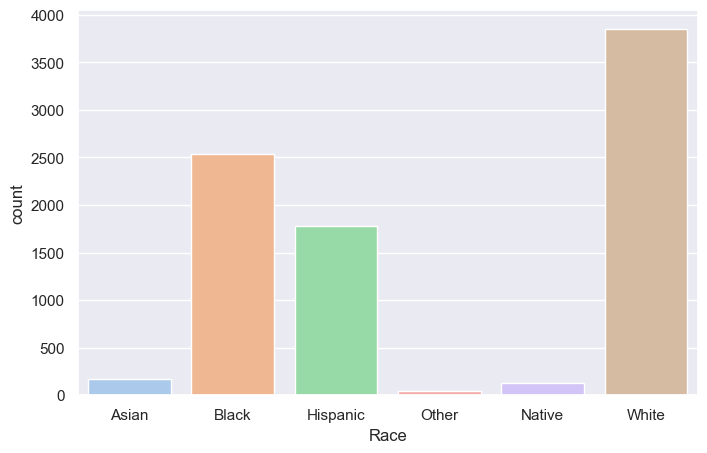

In [ ]:
# Countplot for Cases by Race
%matplotlib inline
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x=df['Race'],data=df,palette='pastel')

***Figure 2***

<AxesSubplot:xlabel='count', ylabel='State'>

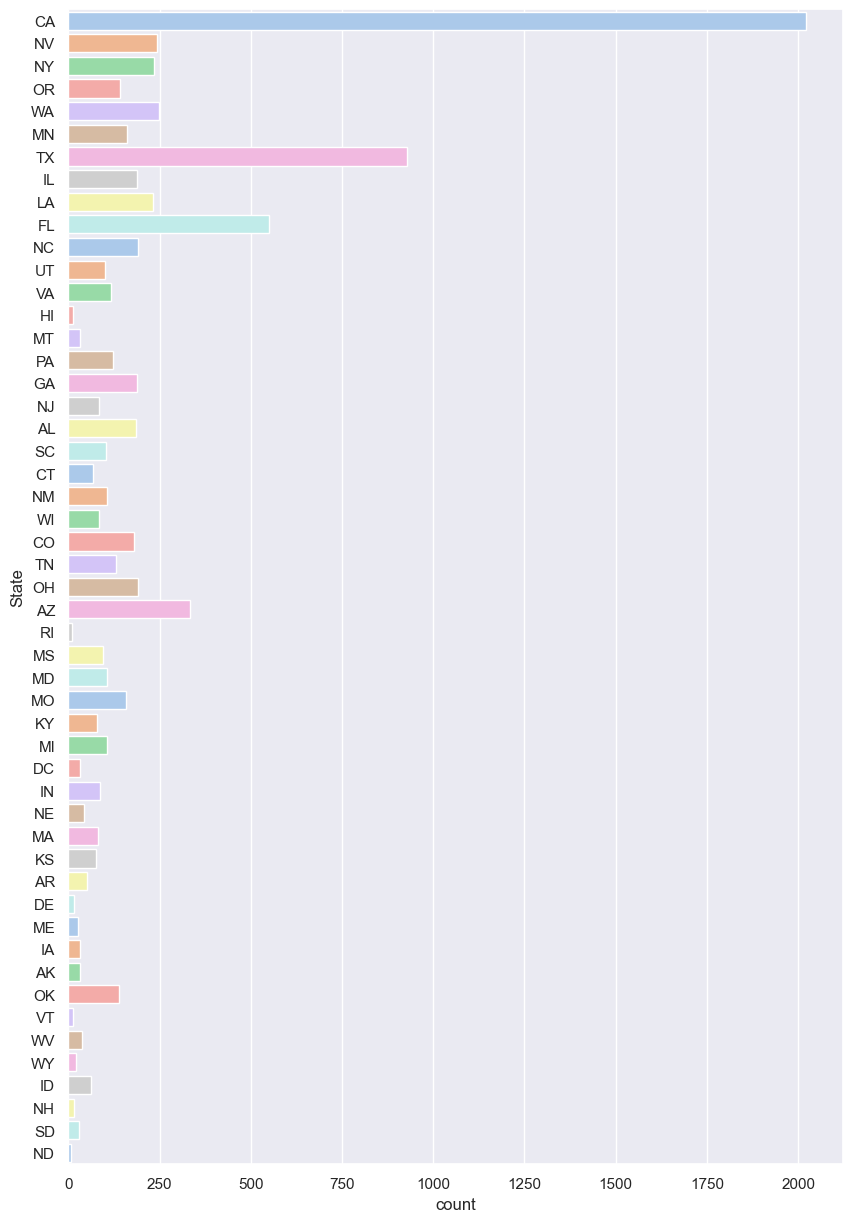

In [ ]:
# Countplot for Cases by State
%matplotlib inline
sns.set(rc={'figure.figsize':(10,15)})
sns.countplot(y=df['State'],data=df,palette='pastel')

<AxesSubplot:xlabel='State', ylabel='count'>

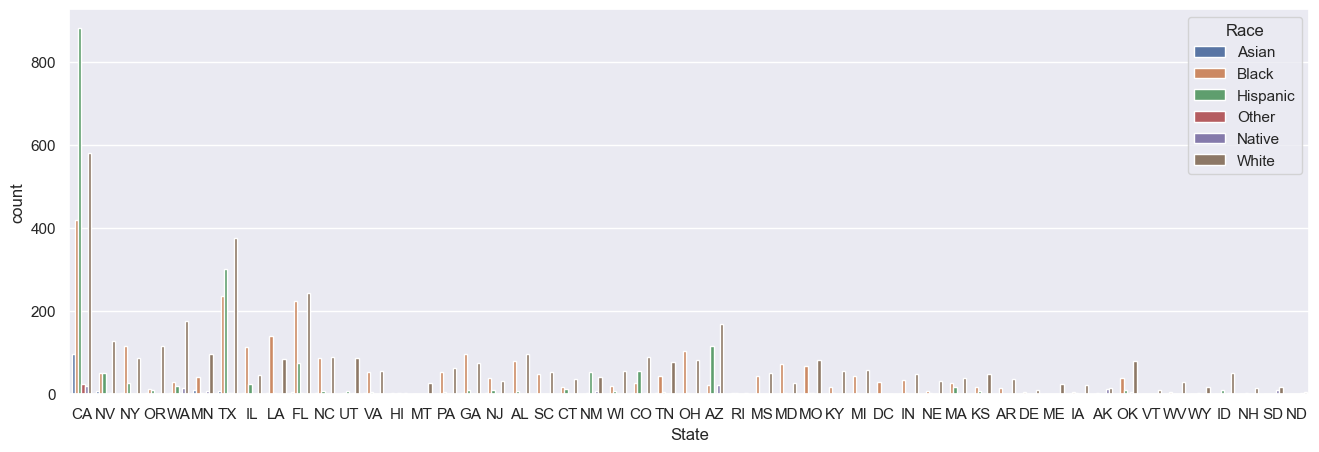

In [ ]:
%matplotlib inline

sns.set(rc={'figure.figsize':(16,5)})

sns.countplot(x=df["State"],data=df,hue=df["Race"])

In [ ]:
#%matplotlib inline
#sns.set(rc={'figure.figsize':(16,5)})
#df['White'] = df["Race"].isin(['White'])
#sns.countplot(data=df,x='State',hue='White')